In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs


#https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"

dataDS = pd.read_csv(filename,skipinitialspace = True)
dataDsc = pd.read_csv(filename2, skipinitialspace = True)
dataPrecaution = pd.read_csv(filename3, skipinitialspace = True)
dataWeight = pd.read_csv(filename4, skipinitialspace = True)





# Vi skal have kombineret noget af mads' med det her, så vi f.eks har argument for valg af kun 6 symptomer (andet end med 17 symptomer ville det tage et døgn at udskifte værdier

Mængden af symptomer langs x-aksen
Vægtningen af symptomer op af y-aksen
Dieasese vil så være klassifikationen



In [17]:

Symp = dataWeight['Symptom']
Weight = dataWeight['weight']

newData = dataDS[['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]

newData.replace(' ', '',regex=True,inplace=True)

for i in range(len(newData)):
    for n in range (len(newData.columns)):
        for S in range (len(Symp)):
            if newData.iat[i,n] == Symp[S]:
                newData.iat[i,n] = Weight[S]
                
newData       
    

D:\Users\marti\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungalinfection,1,3,4,6,NaN,NaN
1,Fungalinfection,3,4,6,NaN,NaN,NaN
2,Fungalinfection,1,4,6,NaN,NaN,NaN
3,Fungalinfection,1,3,6,NaN,NaN,NaN
4,Fungalinfection,1,3,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,(vertigo)ParoymsalPositionalVertigo,5,3,5,6,4,4
4916,Acne,3,2,2,2,NaN,NaN
4917,Urinarytractinfection,6,4,5,6,NaN,NaN
4918,Psoriasis,3,3,3,2,2,2


In [18]:
newData.iat[4917,3]

5

Den følgende kode, fremhæver hvor mange der er af hver disease case (120 af hver 41 sygdomme)

In [20]:
UniqueDiseases = newData['Disease'].value_counts()
UniqueDiseases

Fungalinfection                        120
HepatitisC                             120
HepatitisE                             120
Alcoholichepatitis                     120
Tuberculosis                           120
CommonCold                             120
Pneumonia                              120
Dimorphichemmorhoids(piles)            120
Heartattack                            120
Varicoseveins                          120
Hypothyroidism                         120
Hyperthyroidism                        120
Hypoglycemia                           120
Osteoarthristis                        120
Arthritis                              120
(vertigo)ParoymsalPositionalVertigo    120
Acne                                   120
Urinarytractinfection                  120
Psoriasis                              120
HepatitisD                             120
HepatitisB                             120
Allergy                                120
hepatitisA                             120
GERD       

This code first creates a list of the unique labels, after that it creates a dictionary mapping from label value to a numeric value, and finally does a in place replacing of the label values with the numerical values.

SKAL have fundet ud af hvordan man tager det fra UniqueDiseases og knytter det til mappingen, så vi kan se hvad vi rent faktisk ender med at predict

In [33]:


#print(UniqueDiseases)

labels = newData['Disease'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
newData.replace({'Disease': mapping},inplace=True)




Skal nu have summeret hver række, resultat i 1 kolonne. Mængden af symptomer i en anden kolonne og Disease i tredje kolonne (som kommer fra newData). 

In [45]:
XSum = newData.sum(axis=1) #Sum of each row
YSum = 6-(newData.isnull().sum(axis=1)) #How many symptoms
ClassCol = newData['Disease']

Values = [XSum, YSum, ClassCol]
headers = ["SumOfSymp", "CountOfSymp", "UniqueCode"]

CleanedData = pd.concat(Values, axis=1, keys=headers)

CleanedData

,SumOfSymp,CountOfSymp,UniqueCode
0,14.0,4,0
1,13.0,3,0
2,11.0,3,0
3,10.0,3,0
4,8.0,3,0
...,...,...,...
4915,63.0,6,36
4916,46.0,4,37
4917,59.0,4,38
4918,54.0,6,39


Nu vil jeg så prøve at plotte

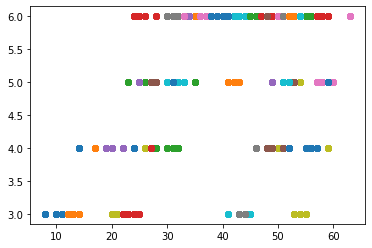

In [52]:
groups = CleanedData.groupby("UniqueCode")
for name, group in groups:
    plt.plot(group["SumOfSymp"], group["CountOfSymp"], marker="o", linestyle="", label=name)
#plt.legend()


#CleanedData.plot(kind='scatter', x='CountOfSymp', y = 'SumOfSymp')